In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the train dataset

In [2]:
import pandas as pd
df_train=pd.read_csv('D:/Python file/Project Datasets/FinalEval/Doctor/Final_Train.csv')  #Path location of the dataset
df_train.head()  #Checking out the top 5 rows of the dataset

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
df_train.shape    #Checking the dimensions of the dataset

(5961, 7)

In [4]:
df_train.columns   #Checking out the columns of the dataset

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

# Dataset Description

Introduction:

    We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the problem statement we need to work on.
    
Features Description:

-> There are totally 5961 rows and 7 columns in the training dataset and the details of the columns are given below:

    1.Qualification: Qualification and degrees held by the doctor

    2.Experience: Experience of the doctor in number of years

    3.Rating: Rating given by patients

    4.Place: Area and the city where the doctor is located.

    5.Profile: Type of the doctor

    6.Miscellaeous_Info: Extra information about the doctor

    7.Fees: Fees charged by the doctor

# Our agenda in this project 

-> We need to predict the doctor's consulting fees with the given data and we need to approach by using regression analysis.

-> First, use the train dataset and do the EDA process, fitting the best model and saving the model.

-> Then, use the test dataset and do the EDA process, load the saved model and predict the values over the test data.

In [5]:
df_train.info()    #Checking the info of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Except fees column, all other columns have categorical data

In [6]:
df_train.isnull().sum()   #Checking for null values in the dataset

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

We can see that Rating, Place and Miscellaneous_Info have null values and we need to handle them.

# Data Pre-processing

In Experience column, we can see that years is present and it is in object type. We need to take the number from Experience and it can be done by using type conversion and replace()

In [7]:
df_train['Experience'] = df_train['Experience'].str.replace("years experience",'').astype('int') #Converting to int datatype
#We are also replacing years experience word with blank

In [8]:
#Now checking the column after replacing
df_train['Experience'].head()   #Top 5 rows

0    24
1    12
2     9
3    12
4    20
Name: Experience, dtype: int32

We can see that the years have been taken and replaced in the column

In the Rating column, we can see that it is given in percentage and it is in object type. We will take only the number and it can be done by using type conversion and replace(). Before that, we need to fill the missing data with the most frequent data used and it can be done by using Simple Imputer library.

In [9]:
#Importing SimpleImputer
from sklearn.impute import SimpleImputer
SI=SimpleImputer(strategy='most_frequent')  #Replacing null values with most frequently used values
df_train['Rating']=SI.fit_transform(df_train['Rating'].values.reshape(-1,1))

In [10]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

We can see that Rating missing values has been replaced with most frequently used values

In [11]:
df_train['Rating'] = df_train['Rating'].str.replace("%",'').astype('int')  #Converting to int datatype
#We are also replacing % with blank

In [12]:
#We are checking the column after replacing
df_train['Rating'].head()   #Top 5 rows

0    100
1     98
2    100
3    100
4    100
Name: Rating, dtype: int32

Rating column has been converted into int by replacing missing data and % 

Let us look into Place column. There are missing values and also the City and Area has been present together. We can split them into 2 separate columns and also before that we will handle missing data using SimpleImputer

In [13]:
SI=SimpleImputer(strategy='most_frequent')  #Replacing null values with most frequently used values
df_train['Place']=SI.fit_transform(df_train['Place'].values.reshape(-1,1))

In [14]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

After handling missing data, we can see that there are no missing values in the column. Now we will split City and Area separately

In [15]:
#Extracting City and Area from Place Column
df_train['City'] = df_train['Place'].str.split(',',1).str.get(1)  #City given after area and they are separated by comma
df_train['Area'] = df_train['Place'].str.split(',',1).str.get(0)  #First is Area given in Place column

In [16]:
#As we extracted City and Area from the Place column, there is no need of Place and we can drop it
df_train.drop(columns='Place',axis=1,inplace=True)

In [17]:
#Checking the dataset after extraction
df_train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Area
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,100,ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,100,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [18]:
df_train['City'].isnull().sum()   #Checking City column for missing data

1

In [19]:
#As we don't know the exact city of the one missing data, we will replace with unknown
df_train['City'].fillna('unknown',inplace=True)

Now we will look into Miscellaneous_Info column. We can see that most of the data has fees and place details and also there are missing data present. We can now create a new column to show the data which has Miscellaneous_Info or not

In [20]:
df_train['Has_Miscellaneous_Info'] = (~df_train['Miscellaneous_Info'].isnull())
df_train['Has_Miscellaneous_Info'] = df_train['Has_Miscellaneous_Info'].astype(int)  #Converting into int type

In [21]:
#After creating the new column, now checking the value counts
df_train['Has_Miscellaneous_Info'].value_counts()

1    3341
0    2620
Name: Has_Miscellaneous_Info, dtype: int64

Here 0 means there is no info and 1 means there is info. 3341 records have miscellaneous info whereas 2620 records don't have any miscellaneous info

In [22]:
#Dropping Miscellaneous_Info column
df_train.drop(columns='Miscellaneous_Info',axis=1,inplace=True)

In [23]:
#Final Checking for null values
print(df_train.isnull().sum())

Qualification             0
Experience                0
Rating                    0
Profile                   0
Fees                      0
City                      0
Area                      0
Has_Miscellaneous_Info    0
dtype: int64


There are no missing values in the dataset and now we can proceed further with EDA process

In [24]:
df_train.head()  #Checking dataset after pre-processing

,Qualification,Experience,Rating,Profile,Fees,City,Area,Has_Miscellaneous_Info
0,"BHMS, MD - Homeopathy",24,100,Homeopath,100,Ernakulam,Kakkanad,1
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,350,Bangalore,Whitefield,1
2,"MBBS, MS - Otorhinolaryngology",9,100,ENT Specialist,300,Bangalore,Mathikere - BEL,0
3,"BSc - Zoology, BAMS",12,100,Ayurveda,250,Bangalore,Bannerghatta Road,1
4,BAMS,20,100,Ayurveda,250,Chennai,Keelkattalai,1


# Exploratory Data Analysis

In [25]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


Text(0.5, 1.0, 'Count of Fees')

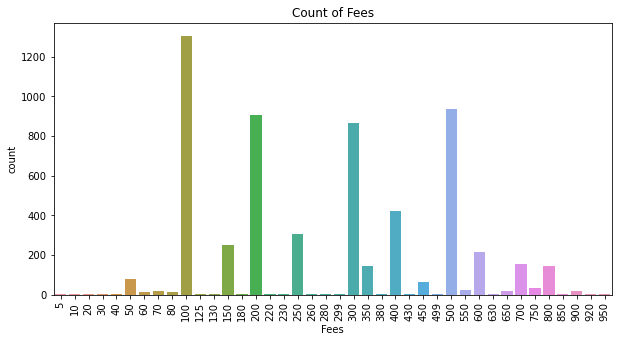

In [26]:
#Checking Fees count details using countplot
print(df_train['Fees'].value_counts())
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(df_train['Fees'].sort_values())
plt.title('Count of Fees')

Observations:

-> We can see that 1306 doctors are collecting 100 rupees as the fees and it is the maximum number.

-> Highest fees collected is Rs.950 and only one doctor is collecting it.

-> Lowest amount of fees is Rs.5 which is the minimum value in this dataset and only one doctor is collecting it.

-> Mostly one doctor has been collecting various value of fees like 20, 230, 499, 850, etc.

100    3986
98      290
99      259
97      241
96      220
95      178
94      115
93      109
92       66
90       66
91       60
89       42
88       41
85       27
82       23
83       21
86       21
80       19
77       16
87       14
84       13
79       13
67       12
81       12
71        9
76        9
75        8
73        8
74        7
60        7
78        6
56        5
68        5
69        4
70        4
57        3
72        3
33        2
64        2
62        2
63        2
55        2
48        1
40        1
7         1
65        1
45        1
53        1
47        1
58        1
36        1
Name: Rating, dtype: int64


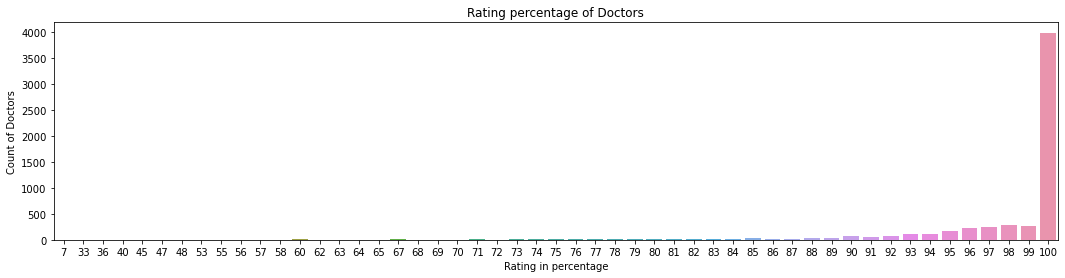

In [27]:
#Checking the Rating given to doctors from patients using countplot
print(df_train['Rating'].value_counts())
plt.subplots(figsize=(18,4))
sns.countplot(x='Rating',data=df_train)
plt.title('Rating percentage of Doctors')
plt.xlabel('Rating in percentage')
plt.ylabel('Count of Doctors')
plt.show()

Observations:

-> Nearly 4000 doctors got 100% rating and it is the maximum value and the exact value is 3986.

-> Minimum rating value given for a doctor is 7%, which has been given by 1 patient and it is the lowest among all.

-> Many number of patients have given rating in the range 81-98 to most of the doctors for their consultations.

9     323
10    294
11    288
8     282
12    279
     ... 
64      1
65      1
58      1
66      1
61      1
Name: Experience, Length: 64, dtype: int64


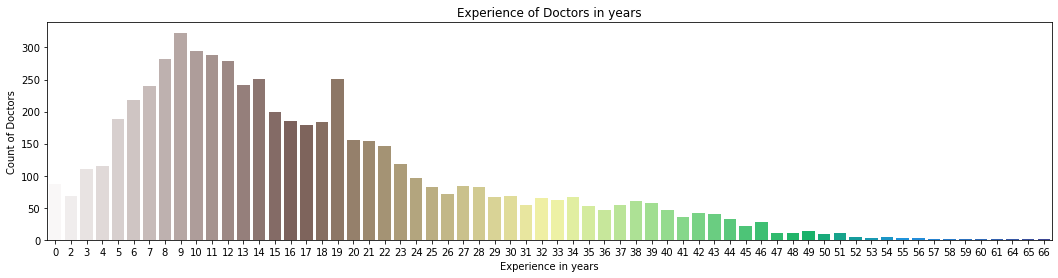

In [28]:
#Checking the experience of doctors using countplot
print(df_train['Experience'].value_counts())
plt.subplots(figsize=(18,4))
sns.countplot(x='Experience',data=df_train,palette='terrain_r')
plt.title('Experience of Doctors in years')
plt.xlabel('Experience in years')
plt.ylabel('Count of Doctors')
plt.show()

Observations:

-> 9 years of experience is the maximum value here and 323 doctors are having it.

-> Minimum years of experience is between 58-64 years and only one doctor is having that kind of experience for every year in      that range.

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


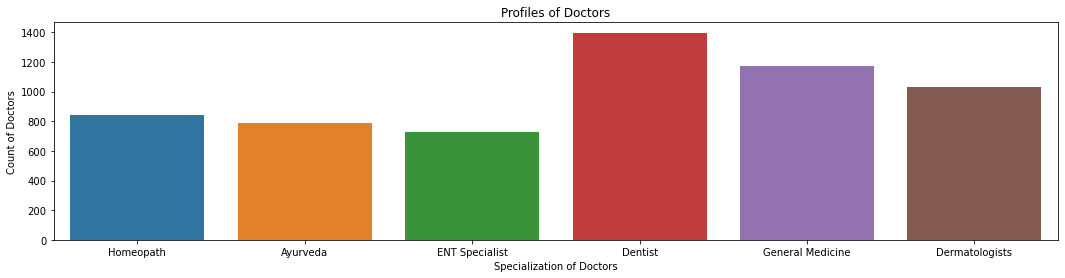

In [29]:
#Checking out the count of profile of doctors using countplot
print(df_train['Profile'].value_counts())
plt.subplots(figsize=(18,4))
sns.countplot(x='Profile',data=df_train)
plt.title('Profiles of Doctors')
plt.xlabel('Specialization of Doctors')
plt.ylabel('Count of Doctors')
plt.show()

Observations:

-> We can see that maximum number of doctors are dentists and there are 1397 records of doctors.

-> Minimum number of doctors are ENT Specialists and there are 728 records of doctors.

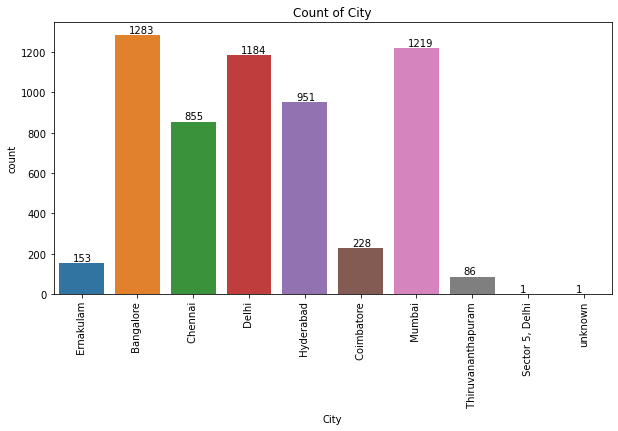

In [30]:
#Checking out the count of city using countplot
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax=sns.countplot(df_train['City'])
plt.title('Count of City')
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

As we can see, there are more number of doctors in Bangalore with 1283 doctors residing there and minumum number of doctors are residing in Thiruvananthapuram with 86 doctors. One doctor is staying in Delhi and another doctor's location is unknown.

1    3341
0    2620
Name: Has_Miscellaneous_Info, dtype: int64


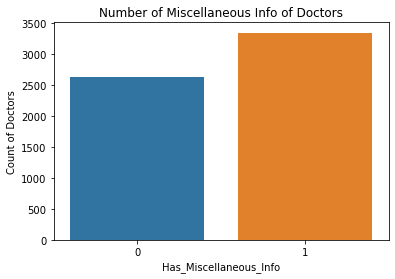

In [31]:
#Checking the doctors who are having Miscellaneous_Info
print(df_train['Has_Miscellaneous_Info'].value_counts())
sns.countplot(x='Has_Miscellaneous_Info',data=df_train)
plt.title('Number of Miscellaneous Info of Doctors')
plt.ylabel('Count of Doctors')
plt.show()

3341 doctors have miscellaneous information whereas 2620 doctors don't have any miscellaneous information

# Bivariate Analysis

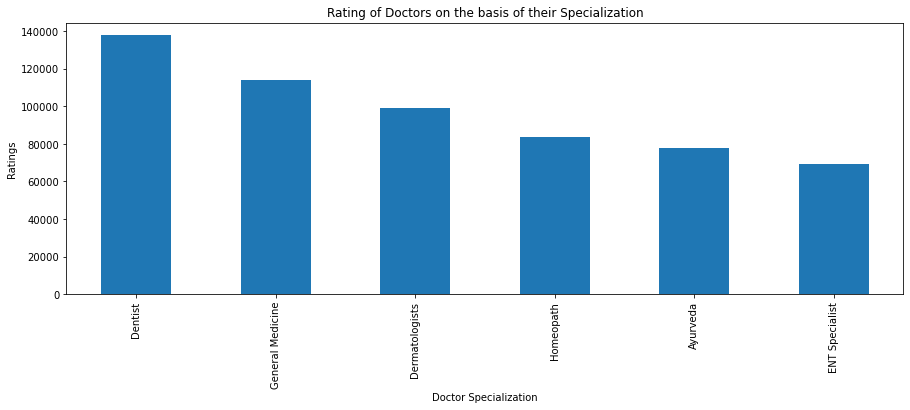

In [32]:
#Checking the rating of doctors on the basis of their Specialization using Barplot
plt.subplots(figsize=(18,4))
df_train.groupby('Profile')['Rating'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Rating of Doctors on the basis of their Specialization')
plt.xlabel('Doctor Specialization')
plt.ylabel('Ratings')
plt.show()

Dentists have more number of ratings whereas ENT Specialists have the less number of Ratings

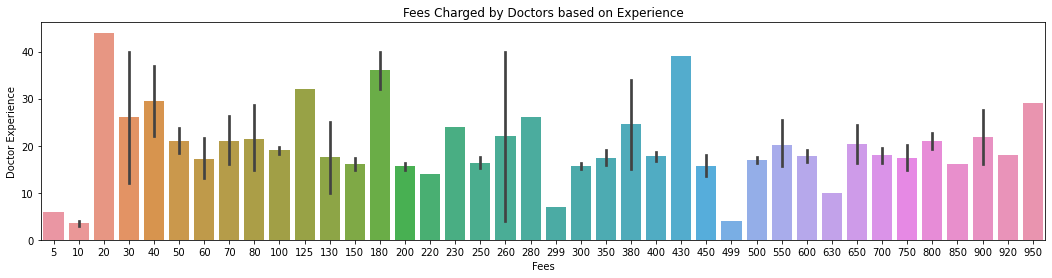

In [33]:
#Checking the Fees charged by doctors on basis of experience
plt.subplots(figsize=(18,4))
sns.barplot(x='Fees',y='Experience',data=df_train)
plt.title('Fees Charged by Doctors based on Experience')
plt.xlabel('Fees')
plt.ylabel('Doctor Experience')
plt.show()

We can see that maximum number of fees is collected by doctors who are having experience above 20 years

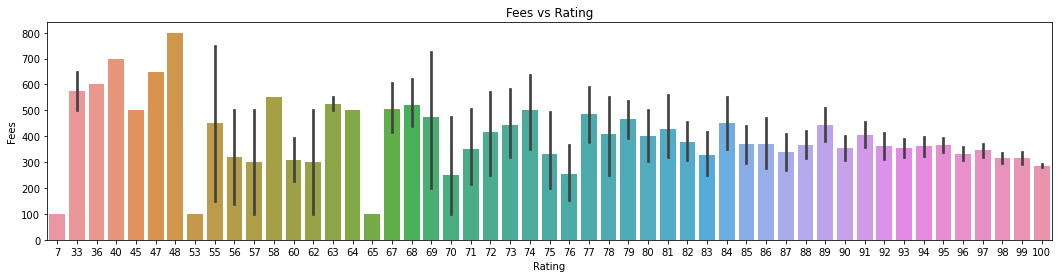

In [34]:
#Checking Fees vs Rating relationship
plt.subplots(figsize=(18,4))
sns.barplot(x='Rating',y='Fees',data=df_train)
plt.title('Fees vs Rating')
plt.xlabel('Rating')
plt.ylabel('Fees')
plt.show()

Doctors who go ratings from the range 80-100 are collecting fees within Rs.400 and the doctors who got less ratings are collecting large amount of fees.

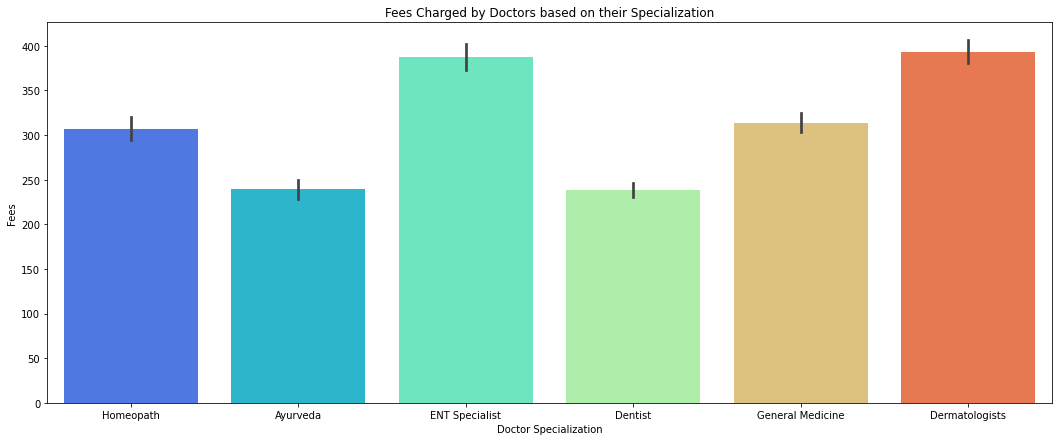

In [35]:
#Checking the fees vs Profile relationship
plt.subplots(figsize=(18,7))
sns.barplot(x='Profile',y='Fees',data=df_train,palette='rainbow')
plt.title('Fees Charged by Doctors based on their Specialization')
plt.xlabel('Doctor Specialization')
plt.ylabel('Fees')
plt.show()

ENT specialists and Dermatologists are charging high amount of fees whereas Ayurvedic doctors and Dentists are charging the lesser amount of fees among all

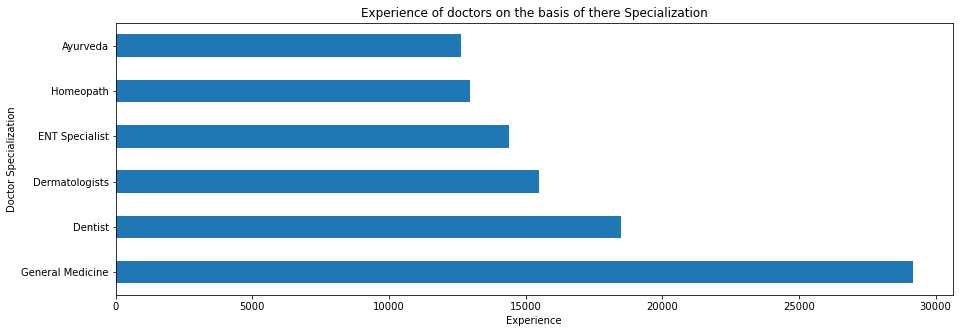

In [36]:
#Checking doctor's profile based on experience
plt.subplots(figsize=(18,4))
df_train.groupby('Profile')['Experience'].sum().sort_values(ascending=False).plot(kind="barh",figsize=(15,5))
plt.title('Experience of doctors on the basis of there Specialization')
plt.xlabel('Experience')
plt.ylabel('Doctor Specialization')
plt.show()

General Medicine doctors have the maximum number of experience in their field whereas Ayurvedic doctors have the less number of experience

# Converting categorical data into numeric data

In [37]:
df_train.dtypes

Qualification             object
Experience                 int32
Rating                     int32
Profile                   object
Fees                       int64
City                      object
Area                      object
Has_Miscellaneous_Info     int32
dtype: object

There are 4 columns having categorical data and as the value counts in each feature is large, we can do Label Encoding by using Label Encoder

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['Qualification','Profile','City','Area']
for i in col:
    df_train[i]=le.fit_transform(df_train[i])   #Conversion

In [39]:
df_train.head()   #Checking the dataset after conversion

,Qualification,Experience,Rating,Profile,Fees,City,Area,Has_Miscellaneous_Info
0,401,24,100,5,100,4,296,1
1,73,12,98,0,350,0,855,1
2,1135,9,100,3,300,0,452,0
3,464,12,100,0,250,0,68,1
4,10,20,100,0,250,1,335,1


In [40]:
#Dropping Has_Miscellaneous_Info column as it is not of much importance
df_train.drop(columns='Has_Miscellaneous_Info',axis=1,inplace=True)

Now all the columns are having numeric data and we can proceed further with analysis

# Multivariate Analysis

In [41]:
df_train.describe()    #Statistical summary of the dataset

,Qualification,Experience,Rating,Profile,Fees,City,Area
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,17.303976,97.610636,2.441872,307.944640,3.061231,410.120282
std,413.842446,11.142798,5.881539,1.658014,190.920373,2.328070,255.174855
min,0.000000,0.000000,7.000000,0.000000,5.000000,0.000000,0.000000
25%,219.000000,9.000000,98.000000,1.000000,150.000000,1.000000,195.000000
50%,596.000000,14.000000,100.000000,2.000000,300.000000,3.000000,404.000000
75%,943.000000,23.000000,100.000000,4.000000,500.000000,5.000000,622.000000
max,1419.000000,66.000000,100.000000,5.000000,950.000000,9.000000,865.000000


Observations:

1.There is not much difference between the mean and the median

2.The minimum value is 0 for all columns except Rating.

3.The 75th percentile and max value difference for Qualification and Fees columns are high and it is due to the presence of       outliers.

In [42]:
#Checking correlation of the dataset
corr=df_train.corr()  #corr() function provides the correlation value of each column
corr

,Qualification,Experience,Rating,Profile,Fees,City,Area
Qualification,1.000000,0.134697,-0.163692,0.393123,0.263214,-0.030607,0.006612
Experience,0.134697,1.000000,-0.149594,0.202073,0.002117,0.037863,0.015970
Rating,-0.163692,-0.149594,1.000000,-0.047013,-0.154713,0.065975,0.031431
Profile,0.393123,0.202073,-0.047013,1.000000,0.145226,-0.013748,0.019533
Fees,0.263214,0.002117,-0.154713,0.145226,1.000000,-0.024793,-0.052750
City,-0.030607,0.037863,0.065975,-0.013748,-0.024793,1.000000,-0.081273
Area,0.006612,0.015970,0.031431,0.019533,-0.052750,-0.081273,1.000000


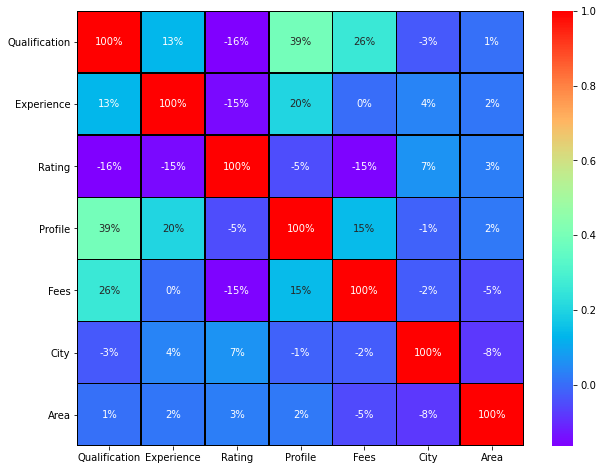

In [43]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

Observations:

1.There are more postive correlations present in the dataset

2.Highest positive correlated column is Profile with Qualification and has a value of 39%.

3.Highest negatively correlated column is Qualification with Rating and it has a value of -16%

4.Positively correlated columns have a high impact with the target variable whereas negatively correlated columns have less or     zero impact with the target variable.

# Checking skewness

In [44]:
df_train.skew()

Qualification    0.239720
Experience       0.991089
Rating          -4.701646
Profile          0.108803
Fees             0.751870
City             0.054003
Area             0.121186
dtype: float64

Experience, Rating and Fees column have skewness and it can be due to the presence of outliers

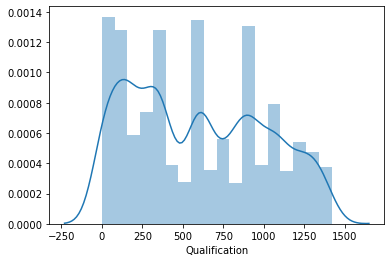

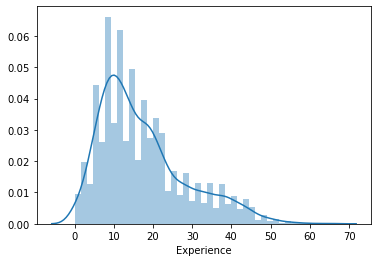

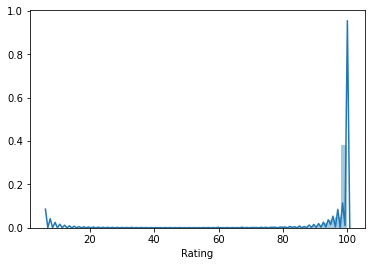

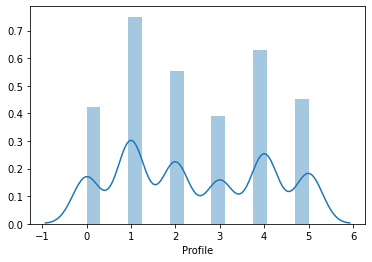

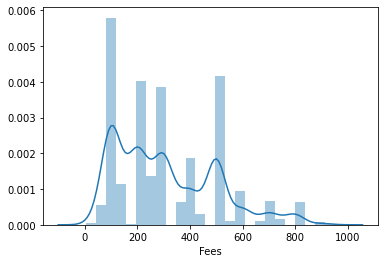

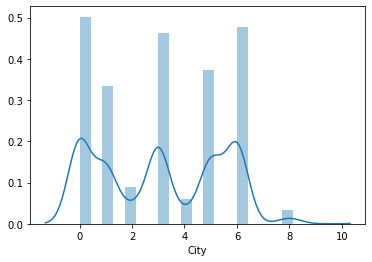

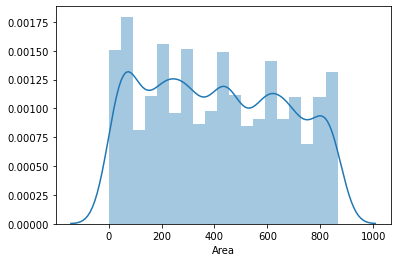

In [45]:
#Plotting distplot for checking the distribution of skewness
for col in df_train.describe().columns:
    sns.distplot(df_train[col])
    plt.show()

All the features data are not normally distributed and it is due to the presence of outliers

# Checking outliers

We can check outliers by plotting boxplot

In [46]:
collist=df_train.columns.values 
ncol=10
nrows=10

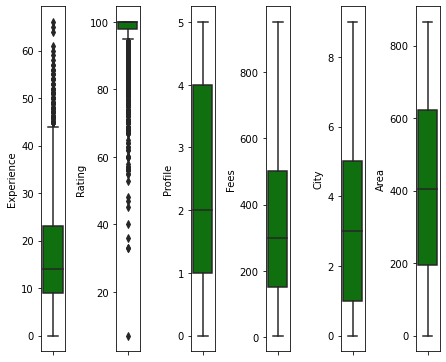

In [47]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_train[collist[i]],color='green',orient='v')
    plt.tight_layout()

As there are outliers present in this dataset, we can handle them by using z-score

# Handling outliers by using z-score method

In [48]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_train))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([  18,   55,   67,  105,  110,  140,  178,  183,  209,  275,  293,
         309,  325,  333,  372,  377,  458,  465,  585,  590,  632,  692,
         731,  787,  788,  810,  815,  851,  901,  911,  918,  968,  979,
         987,  990,  998, 1009, 1016, 1018, 1111, 1170, 1240, 1303, 1314,
        1392, 1425, 1433, 1437, 1444, 1475, 1592, 1594, 1614, 1631, 1635,
        1648, 1717, 1741, 1743, 1747, 1778, 1796, 1852, 1860, 1877, 1937,
        1981, 2023, 2062, 2089, 2161, 2165, 2202, 2252, 2262, 2277, 2281,
        2309, 2323, 2391, 2393, 2428, 2478, 2500, 2522, 2548, 2585, 2623,
        2631, 2646, 2670, 2708, 2715, 2726, 2738, 2758, 2829, 2833, 2962,
        2991, 3093, 3120, 3126, 3144, 3180, 3222, 3254, 3270, 3295, 3333,
        3365, 3367, 3463, 3478, 3493, 3526, 3537, 3593, 3604, 3608, 3615,
        3627, 3661, 3676, 3690, 3766, 3783, 3820, 3861, 3942, 3960, 4040,
        4052, 4055, 4058, 4135, 4167, 4174, 4212, 4212, 4219, 4257, 4344,
        4459, 4474, 4478, 4509, 4581, 

In [49]:
#Removing outliers
df_newtrain=df_train[(z<3).all(axis=1)]
df_newtrain

,Qualification,Experience,Rating,Profile,Fees,City,Area
0,401,24,100,5,100,4,296
1,73,12,98,0,350,0,855
2,1135,9,100,3,300,0,452
3,464,12,100,0,250,0,68
4,10,20,100,0,250,1,335
...,...,...,...,...,...,...,...
5956,1075,19,98,3,300,0,70
5957,596,33,100,4,100,1,535
5958,596,41,97,4,600,3,215
5959,943,15,90,4,100,6,840


In [50]:
df_train.shape   #Original dataset dimensions

(5961, 7)

In [51]:
df_newtrain.shape    #New dataset dimensions

(5767, 7)

Nearly 150+ rows had outliers and they have been removed by using z-score method

# Percentage loss of data after removing outliers

In [52]:
percentage_loss=((194)/5961)*100   #194 = 5961-5767
print(percentage_loss)

3.2544875020969637


Only 3.2% of the data has been lost and it is not a big loss

# Preparing dataset for model training

We need to split independent and dependent variables from the dataset in order to perform further analysis

In [53]:
df_x=df_newtrain.drop('Fees',axis=1)   #Independent variables
y=df_newtrain['Fees']    #Dependent or Target Variable

In [54]:
#Checking x data
df_x.head()

,Qualification,Experience,Rating,Profile,City,Area
0,401,24,100,5,4,296
1,73,12,98,0,0,855
2,1135,9,100,3,0,452
3,464,12,100,0,0,68
4,10,20,100,0,1,335


In [55]:
#Checking y data after splitting
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

# Treating skewness

In [56]:
#We are treating skewness by using square root transform
for col in df_x.skew().index:
    if col in df_x.describe().columns:
        if df_x[col].skew()>0.55:
            df_x[col]=np.sqrt(df_x[col])
        if df_x[col].skew()<-0.55:
            df_x[col]=np.cbrt(df_x[col])

In [57]:
df_x.skew()   #Checking skewness after treating it

Qualification    0.278898
Experience       0.033997
Rating          -2.794696
Profile          0.138511
City             0.052546
Area             0.118220
dtype: float64

We can see that skewness has been treated and we can proceed further analysis

# Scaling the data

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [58]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Qualification,Experience,Rating,Profile,City,Area
0,-0.451294,0.763439,0.478622,1.545935,0.399964,-0.448766
1,-1.241049,-0.318413,-0.066760,-1.448626,-1.316890,1.735829
2,1.316024,-0.668330,0.478622,0.348111,-1.316890,0.160888
3,-0.299603,-0.318413,0.478622,-1.448626,-1.316890,-1.339800
4,-1.392740,0.441612,0.478622,-1.448626,-0.887677,-0.296352
...,...,...,...,...,...,...
5762,1.171557,0.356235,-0.066760,0.348111,-1.316890,-1.331983
5763,0.018225,1.400981,0.478622,0.947023,-0.887677,0.485256
5764,0.018225,1.897515,-0.342237,0.947023,-0.029249,-0.765317
5765,0.853728,-0.010129,-2.325691,0.947023,1.258392,1.677208


# Building the model

In [59]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [60]:
#Checking the best random state for finalising the train and test data
def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,1000):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(x_train,y_train)
        pred=reg.predict(x_test)
        r2score=r2_score(y_test,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [61]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.12405739473609712 is achieved at random state 523


We can see that at random_state=523, we are getting the best scores so that we can create train_test_split with that

In [62]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=523,test_size=.20)

# Finding out the best model

We are going to use LinearRegression, Lasso, ElasticNet, Ridge, SVR and KNeighborsRegressor algorithms for finding out the best model among those

In [63]:
#Importing required metrices and model for the dataset
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [64]:
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
svr=SVR()
knr=KNeighborsRegressor()

In [65]:
models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Support Vector Regressor',svr))
models.append(('KNeighbors Regressor',knr))

In [66]:
#Importing required metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [67]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


r2_score:  0.12405739473609712


cross_val_score:  0.08477100471913664


Standard Deviation:  0.0049041536330231604


Mean Absolute Error:  144.4948288917265


Mean Squared Error:  31120.22890354259


Root Mean Squared Error:  176.4092653562805



****************************** Lasso Regression ***************************


Lasso()


r2_score:  0.12265743261157935


cross_val_score:  0.0847329991346856


Standard Deviation:  0.005064713604936576


Mean Absolute Error:  144.77458376537794


Mean Squared Error:  31169.966342399282


Root Mean Squared Error:  176.55018080534293



****************************** Elastic Net Regression ***************************


ElasticNet()


r2_score:  0.10404503584422298


cross_val_score:  0.07782499415434951


Standard Deviation:  0.004159426442065133


Mean Absolute Error:  146.60083447423295


Mean Squared Error:  31831.222050664757


Root Mean Squa

In [68]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'r2_score': score, 'Cross_val_score':cvs, 'Standard_deviation':sd,
                     'Mean_absolute_error':mae, 'Mean_squared_error':mse, 'Root_Mean_Squared_error':rmse})
result

,Model,r2_score,Cross_val_score,Standard_deviation,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,12.405739,8.477100,0.004904,144.494829,31120.228904,176.409265
1,Lasso Regression,12.265743,8.473300,0.005065,144.774584,31169.966342,176.550181
2,Elastic Net Regression,10.404504,7.782499,0.004159,146.600834,31831.222051,178.413066
3,Ridge Regression,12.405027,8.477171,0.004904,144.495767,31120.482140,176.409983
4,Support Vector Regressor,7.968159,4.973226,0.018104,140.705050,32696.799283,180.822563
5,KNeighbors Regressor,8.550840,3.619610,0.024302,140.307799,32489.786066,180.249233


We can see that LinearRegression and Ridge are giving the best r2_scores and cross_val_score. Now we will perform Hyperparameter Tuning to find out the best parameters and try to increase our scores.

# Hyperparameter Tuning

Linear Regression

In [69]:
#Creating parameter list to pass in GridSearchCV
parameters={'fit_intercept':[True,False],'copy_X':[True,False],'normalize':[True,False]}

In [70]:
#Using GridSearchCV to run the parameters and checking final r2_score
from sklearn.model_selection import GridSearchCV
LR=LinearRegression()
grid=GridSearchCV(LR,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'copy_X': True, 'fit_intercept': True, 'normalize': False}
0.0754046955645743


In [71]:
#Using the best parameters obtained
LR=LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print('Final r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(LR,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(LR,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

Final r2_score after tuning is:  12.405739473609712
Cross validation score:  8.477100471913664
Standard deviation:  0.0049041536330231604


Mean absolute error:  144.4948288917265
Mean squared error:  31120.22890354259
Root Mean squared error:  176.4092653562805


Ridge

In [72]:
#Creating parameter list to pass in GridSearchCV
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','lsqr','svd','sag']}

In [73]:
#Using GridSearchCV to run the parameters and checking final r2_score
from sklearn.model_selection import GridSearchCV
rd=Ridge()
grid=GridSearchCV(rd,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'alpha': 10, 'solver': 'auto'}
0.07541044580381635


In [74]:
#Using the best parameters obtained to find r2_score
rd=Ridge(alpha=10, solver='auto')
max_r2_score(rd,x,y)

The maximum r2 score 0.12398595853577943 is achieved at random state 523


In [75]:
#Finding other metrices
print('Cross validation score: ',cross_val_score(rd,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(rd,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

Cross validation score:  8.477772141897011
Standard deviation:  0.004901066282969633


Mean absolute error:  144.4948288917265
Mean squared error:  31120.22890354259
Root Mean squared error:  176.4092653562805


We can see that evenafter applying Hyperparameter Tuning, our scores were not increased. Now we will try Ensemble Techniques like RandomForestRegressor, AdaBoostRegressor and GradientBoostingRegressor to boost up our scores.

# Ensemble Techniques for boosting our scores

In [76]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=523)   #Using the best random state we obtained
parameters={'criterion':['mse','mae'],'n_estimators':[10,50,100,500],'max_features':['auto','sqrt','log2']}
grid=GridSearchCV(rfr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'mae', 'max_features': 'sqrt', 'n_estimators': 500}
0.17576252152802174


In [77]:
#Using the best parameters obtained
RF=RandomForestRegressor(random_state=523, criterion='mae', n_estimators=500, max_features='sqrt')
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  22.140896327503878
Cross validation score:  19.113265647861837
Standard deviation:  0.013682218751773308


Mean absolute error:  128.70542980935875
Mean squared error:  27661.551270048527
Root Mean squared error:  166.31762164619997


In [78]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor(random_state=523)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500],'learning_rate':[0.001,0.01,0.1,1],'loss':['linear','square']}
grid=GridSearchCV(adr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 10}
0.13387961416500632


In [79]:
#Using the best parameters obtained
adr=AdaBoostRegressor(random_state=523, n_estimators=10, learning_rate=0.1, loss='linear')
adr.fit(x_train,y_train)
pred=adr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(adr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(adr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  14.116711202755305
Cross validation score:  13.014972529076415
Standard deviation:  0.01217211519674466


Mean absolute error:  141.5542437055597
Mean squared error:  30512.35994570763
Root Mean squared error:  174.67787480304318


In [80]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=523)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500,1000],'learning_rate':[0.001,0.01,0.1,1],'loss':['ls','lad','huber']}
grid=GridSearchCV(gbr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'learning_rate': 0.1, 'loss': 'ls', 'n_estimators': 100}
0.2022800948911526


In [81]:
#Using the best parameters obtained
gbr=GradientBoostingRegressor(random_state=523, n_estimators=100, learning_rate=0.1, loss='ls')
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  21.36158655566527
Cross validation score:  20.375412971072908
Standard deviation:  0.01393805033482761


Mean absolute error:  132.0697938449043
Mean squared error:  27938.42213282701
Root Mean squared error:  167.14790496092678


After applying Ensemble Techniques, we can see that RandomForestRegressor is the best performing algorithm among all other algorithms as it is giving a r2_score of 22.14 and cross validation score of 19.11. It has also the less amount of error values obtained. Lesser the RMSE score, the better the model. Now we will finalize the model.

# Finalizing the model

In [82]:
rf_prediction=RF.predict(x)
print('Predictions of RandomForest Regressor: ',rf_prediction)   #Printing the predicted values

Predictions of RandomForest Regressor:  [190.68 314.55 357.61 ... 439.1  174.05 218.1 ]


In [83]:
#Saving the model
import pickle
filename='DoctorFees_Project.pkl'   #Specifying the filename
pickle.dump(RF,open(filename,'wb'))   

# Saving the predicted values

In [84]:
train_results=pd.DataFrame(rf_prediction)
train_results.to_csv('DoctorFees_Project_TrainDataResults.csv')

Now, we have saved the model which has the predictions of the training data we had used. Next, we will use the test data and find the predictions using the trained data we have

# Using the test dataset 

In [85]:
df_test=pd.read_csv('D:/Python file/Project Datasets/FinalEval/Doctor/Final_Test.csv')  #Path location of the dataset
df_test.head()  #Checking out the top 5 rows of the dataset

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [86]:
df_test.shape   #Checking out the dimensions of the dataset

(1987, 6)

There are 1987 records of doctor and 6 columns

In [87]:
df_test.isnull().sum()    #Checking for missing values

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

We can see that Rating, Place and Miscellaneous_Info have missing data and we need to handle it.

# Data pre-processing

In Experience column, we can see that years is present and it is in object type. We need to take the number from Experience and it can be done by using type conversion and replace()

In [88]:
df_test['Experience'] = df_test['Experience'].str.replace("years experience",'').astype('int') #Converting to int datatype
#We are also replacing years experience word with blank

In [89]:
#Now checking the column after replacing
df_test['Experience'].head()   #Top 5 rows

0    35
1    31
2    40
3     0
4    16
Name: Experience, dtype: int32

We can see that the years have been taken and replaced in the column

In the Rating column, we can see that it is given in percentage and it is in object type. We will take only the number and it can be done by using type conversion and replace(). Before that, we need to fill the missing data with the most frequent data used and it can be done by using Simple Imputer library.

In [90]:
#Importing SimpleImputer
from sklearn.impute import SimpleImputer
SI=SimpleImputer(strategy='most_frequent')  #Replacing null values with most frequently used values
df_test['Rating']=SI.fit_transform(df_test['Rating'].values.reshape(-1,1))

In [91]:
df_test.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Place                   6
Profile                 0
Miscellaneous_Info    834
dtype: int64

We can see that Rating missing values has been replaced with most frequently used values

In [92]:
df_test['Rating'] = df_test['Rating'].str.replace("%",'').astype('int')  #Converting to int datatype
#We are also replacing % with blank

In [93]:
#We are checking the column after replacing
df_test['Rating'].head()   #Top 5 rows

0    100
1    100
2     70
3    100
4    100
Name: Rating, dtype: int32

Rating column has been converted into int by replacing missing data and %

Let us look into Place column. There are missing values and also the City and Area has been present together. We can split them into 2 separate columns and also before that we will handle missing data using SimpleImputer.

In [94]:
SI=SimpleImputer(strategy='most_frequent')  #Replacing null values with most frequently used values
df_test['Place']=SI.fit_transform(df_test['Place'].values.reshape(-1,1))

In [95]:
df_test.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Place                   0
Profile                 0
Miscellaneous_Info    834
dtype: int64

After handling missing data, we can see that there are no missing values in the column. Now we will split City and Area separately.

In [96]:
#Extracting City and Area from Place Column
df_test['City'] = df_test['Place'].str.split(',',1).str.get(1)  #City given after area and they are separated by comma
df_test['Area'] = df_test['Place'].str.split(',',1).str.get(0)  #First is Area given in Place column

In [97]:
#As we extracted City and Area from the Place column, there is no need of Place and we can drop it
df_test.drop(columns='Place',axis=1,inplace=True)

In [98]:
#Checking the dataset after extraction
df_test.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,City,Area
0,MBBS,35,100,General Medicine,NaN,Mumbai,Ghatkopar East
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100,ENT Specialist,NaN,Hyderabad,West Marredpally
2,"MBBS, DDVL",40,70,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,KK Nagar
3,BAMS,0,100,Ayurveda,NaN,Delhi,New Ashok Nagar
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,Kanakpura Road


In [99]:
#Checking for any missing data
df_test.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Profile                 0
Miscellaneous_Info    834
City                    0
Area                    0
dtype: int64

Now we will look into Miscellaneous_Info column. We can see that most of the data has fees and place details and also there are missing data present. We can now create a new column to show the data which has Miscellaneous_Info or not.

In [100]:
df_test['Has_Miscellaneous_Info'] = (~df_test['Miscellaneous_Info'].isnull())
df_test['Has_Miscellaneous_Info'] = df_test['Has_Miscellaneous_Info'].astype(int)  #Converting into int type

In [101]:
#After creating the new column, now checking the value counts
df_test['Has_Miscellaneous_Info'].value_counts()

1    1153
0     834
Name: Has_Miscellaneous_Info, dtype: int64

Here 0 means there is no info and 1 means there is info. 1153 records have miscellaneous info whereas 834 records don't have any miscellaneous info

In [102]:
#Dropping Miscellaneous_Info column
df_test.drop(columns='Miscellaneous_Info',axis=1,inplace=True)

In [103]:
#Final Checking for null values
print(df_test.isnull().sum())

Qualification             0
Experience                0
Rating                    0
Profile                   0
City                      0
Area                      0
Has_Miscellaneous_Info    0
dtype: int64


There are no missing values in the dataset and now we can proceed further with EDA process

In [104]:
df_test.head()  #Checking dataset after pre-processing

,Qualification,Experience,Rating,Profile,City,Area,Has_Miscellaneous_Info
0,MBBS,35,100,General Medicine,Mumbai,Ghatkopar East,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,100,ENT Specialist,Hyderabad,West Marredpally,0
2,"MBBS, DDVL",40,70,Dermatologists,Chennai,KK Nagar,1
3,BAMS,0,100,Ayurveda,Delhi,New Ashok Nagar,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100,Dentist,Bangalore,Kanakpura Road,1


# Exploratory Data Analysis

# Univariate Analysis

100    1313
98      112
97       84
99       68
96       65
94       51
95       47
93       34
92       29
90       29
91       26
88       13
83       11
89       11
87       11
82        9
85        8
84        7
80        7
71        7
86        6
73        5
67        5
76        4
70        4
60        4
81        3
55        3
79        2
69        2
64        2
78        1
77        1
65        1
53        1
52        1
Name: Rating, dtype: int64


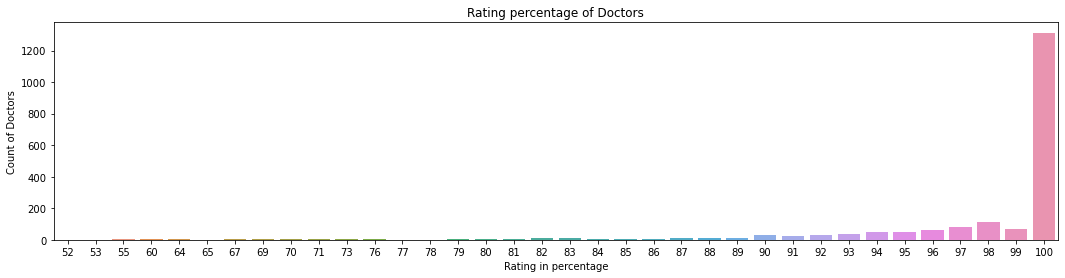

In [105]:
#Checking the Rating given to doctors from patients using countplot
print(df_test['Rating'].value_counts())
plt.subplots(figsize=(18,4))
sns.countplot(x='Rating',data=df_test)
plt.title('Rating percentage of Doctors')
plt.xlabel('Rating in percentage')
plt.ylabel('Count of Doctors')
plt.show()

Observations:

-> Nearly 1000 doctors got 100% rating and it is the maximum value and the exact value is 1313.

-> Minimum rating value given for a doctor is 52%, which has been given by 1 patient and it is the lowest among all.

-> Many number of patients have given rating in the range 85-100 to most of the doctors for their consultations.

10    110
8      98
9      96
19     92
7      89
11     86
13     83
14     81
12     79
17     72
18     70
6      62
15     57
16     51
5      50
23     49
21     48
20     48
29     46
4      44
22     37
24     34
3      33
25     33
26     32
0      31
28     29
27     27
34     27
36     27
31     26
38     23
30     18
32     16
44     16
40     15
37     14
39     13
35     13
41     12
33     11
2      11
46     11
42     10
43     10
47      9
49      8
45      7
48      6
59      4
50      3
51      3
52      2
54      2
53      1
56      1
65      1
Name: Experience, dtype: int64


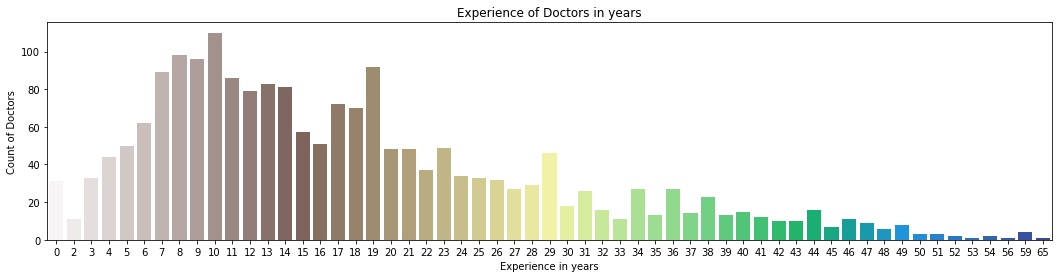

In [106]:
#Checking the experience of doctors using countplot
print(df_test['Experience'].value_counts())
plt.subplots(figsize=(18,4))
sns.countplot(x='Experience',data=df_test,palette='terrain_r')
plt.title('Experience of Doctors in years')
plt.xlabel('Experience in years')
plt.ylabel('Count of Doctors')
plt.show()

Observations:

-> 10 years of experience is the maximum value here and 110 doctors are having it.

-> Minimum years of experience is between 50-65 years and only few doctors are having that kind of experience for every year in    that range.

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64


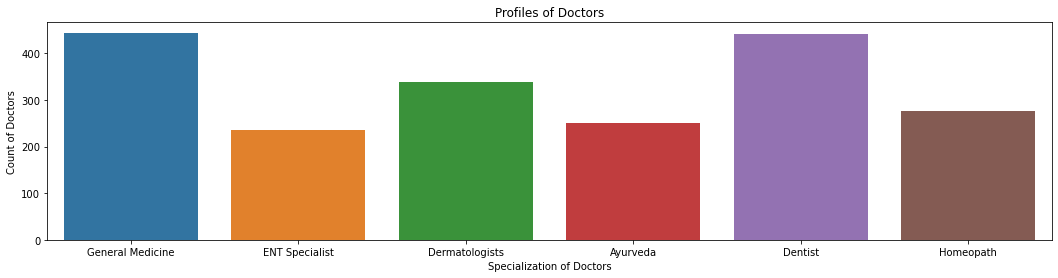

In [107]:
#Checking out the count of profile of doctors using countplot
print(df_test['Profile'].value_counts())
plt.subplots(figsize=(18,4))
sns.countplot(x='Profile',data=df_test)
plt.title('Profiles of Doctors')
plt.xlabel('Specialization of Doctors')
plt.ylabel('Count of Doctors')
plt.show()

Observations:

-> We can see that maximum number of doctors are in General Medicine and Dentists, where there are 444 records of General          Medicine doctors and 441 records of Dentist.

-> Minimum number of doctors are ENT Specialists and there are 235 records of doctors.

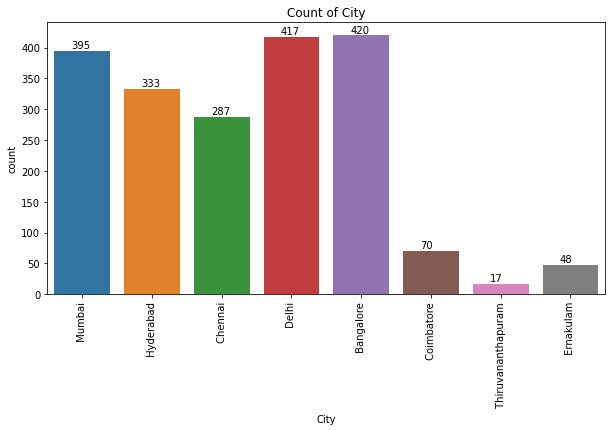

In [108]:
#Checking out the count of city using countplot
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
ax=sns.countplot(df_test['City'])
plt.title('Count of City')
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

As we can see, there are more number of doctors in Bangalore with 420 doctors residing there and minumum number of doctors are residing in Thiruvananthapuram with 17 doctors.

1    1153
0     834
Name: Has_Miscellaneous_Info, dtype: int64


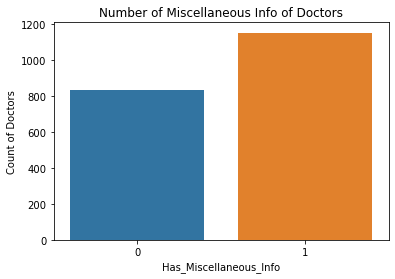

In [109]:
#Checking the doctors who are having Miscellaneous_Info
print(df_test['Has_Miscellaneous_Info'].value_counts())
sns.countplot(x='Has_Miscellaneous_Info',data=df_test)
plt.title('Number of Miscellaneous Info of Doctors')
plt.ylabel('Count of Doctors')
plt.show()

1153 doctors have miscellaneous information whereas 834 doctors don't have any miscellaneous information

# Bivariate Analysis 

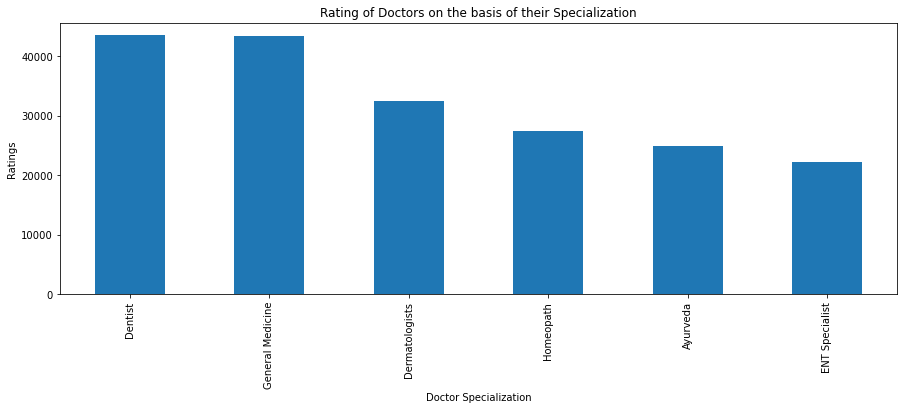

In [110]:
#Checking the rating of doctors on the basis of their Specialization using Barplot
plt.subplots(figsize=(18,4))
df_test.groupby('Profile')['Rating'].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Rating of Doctors on the basis of their Specialization')
plt.xlabel('Doctor Specialization')
plt.ylabel('Ratings')
plt.show()

Dentists and General Medicine doctors have more number of ratings whereas ENT Specialists have the less number of Ratings

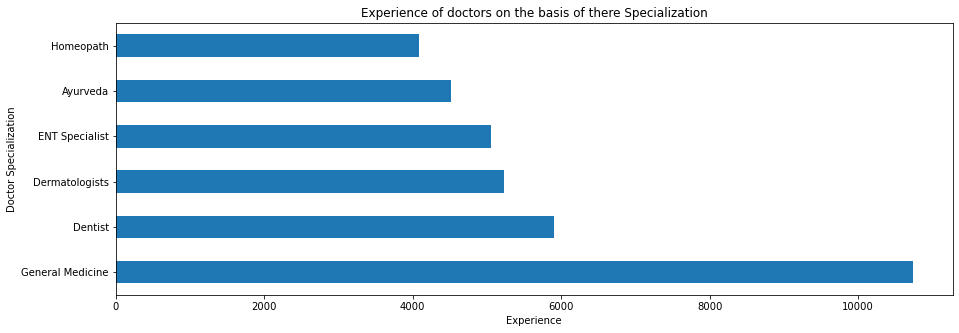

In [111]:
#Checking doctor's profile based on experience
plt.subplots(figsize=(18,4))
df_test.groupby('Profile')['Experience'].sum().sort_values(ascending=False).plot(kind="barh",figsize=(15,5))
plt.title('Experience of doctors on the basis of there Specialization')
plt.xlabel('Experience')
plt.ylabel('Doctor Specialization')
plt.show()

General Medicine doctors have the maximum number of experience in their field whereas Homeopath doctors have the less number of experience

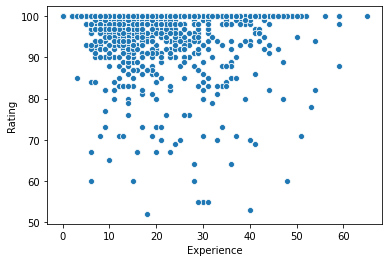

In [112]:
#Scatter plot between 2 variables
sns.scatterplot(x='Experience',y='Rating',data=df_test)

# Converting categorical data into numeric data

In [113]:
df_test.dtypes

Qualification             object
Experience                 int32
Rating                     int32
Profile                   object
City                      object
Area                      object
Has_Miscellaneous_Info     int32
dtype: object

There are 4 columns having categorical data and as the value counts in each feature is large, we can do Label Encoding by using Label Encoder

In [114]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['Qualification','Profile','City','Area']
for i in col:
    df_test[i]=le.fit_transform(df_test[i])   #Conversion

In [115]:
df_test.head()   #Checking the dataset after conversion

,Qualification,Experience,Rating,Profile,City,Area,Has_Miscellaneous_Info
0,241,35,100,4,6,142,0
1,340,31,100,3,5,577,0
2,258,40,70,2,1,212,1
3,6,0,100,0,3,373,0
4,79,16,100,1,0,231,1


In [116]:
#Dropping Has_Miscellaneous_Info column as it is not of much importance
df_test.drop(columns='Has_Miscellaneous_Info',axis=1,inplace=True)

Now all the columns are having numeric data and we can proceed further with analysis

# Multivariate Analysis

In [117]:
df_test.describe()    #Statistical summary of the dataset

,Qualification,Experience,Rating,Profile,City,Area
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,259.979869,17.874685,97.490689,2.508807,3.031706,288.216910
std,185.961177,11.366764,5.793117,1.654223,2.266597,173.420859
min,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000
25%,93.000000,9.000000,98.000000,1.000000,1.000000,137.000000
50%,241.000000,15.000000,100.000000,2.000000,3.000000,289.000000
75%,417.000000,24.000000,100.000000,4.000000,5.000000,438.000000
max,629.000000,65.000000,100.000000,5.000000,7.000000,588.000000


Observations:

1.There is not much difference between the mean and the median

2.The minimum value is 0 for all columns except Rating.

3.The 75th percentile and max value difference for Qualification and Area columns are high and it is due to the presence of outliers.

In [118]:
#Checking correlation of the dataset
corr=df_test.corr()  #corr() function provides the correlation value of each column
corr

,Qualification,Experience,Rating,Profile,City,Area
Qualification,1.000000,0.112672,-0.154947,0.372002,-0.036445,0.021960
Experience,0.112672,1.000000,-0.135230,0.154077,-0.003969,0.041298
Rating,-0.154947,-0.135230,1.000000,-0.037941,0.049778,0.015984
Profile,0.372002,0.154077,-0.037941,1.000000,0.030208,-0.002698
City,-0.036445,-0.003969,0.049778,0.030208,1.000000,-0.107065
Area,0.021960,0.041298,0.015984,-0.002698,-0.107065,1.000000


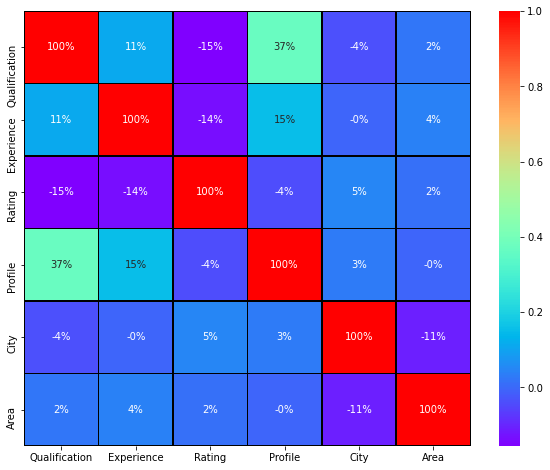

In [119]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

Observations:

1.There are more postive correlations present in the dataset

2.Highest positive correlated column is Profile with Qualification and has a value of 37%.

3.Highest negatively correlated column is Qualification with Rating and it has a value of -15%

4.Positively correlated columns have a high impact with the target variable whereas negatively correlated columns have less or zero impact with the target variable.

# Checking skewness

In [120]:
df_test.skew()

Qualification    0.280822
Experience       0.963447
Rating          -3.824326
Profile          0.028926
City            -0.009157
Area             0.041189
dtype: float64

Experience and Rating column have high skewness and it can be due to the presence of outliers

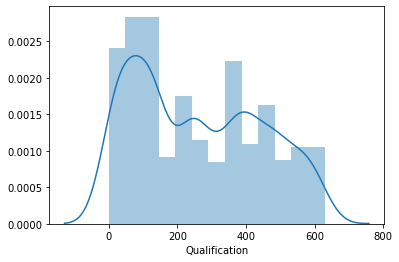

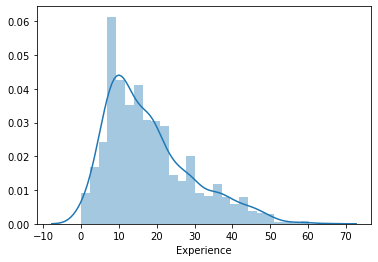

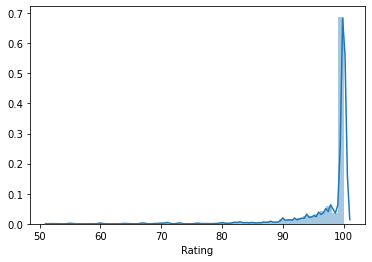

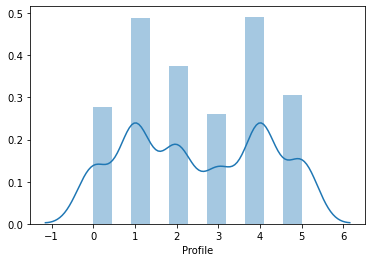

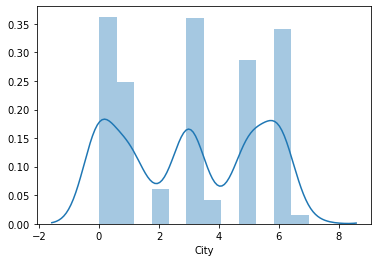

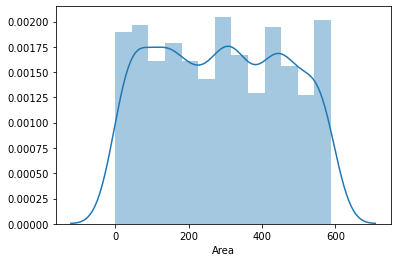

In [121]:
#Plotting distplot for checking the distribution of skewness
for col in df_test.describe().columns:
    sns.distplot(df_test[col])
    plt.show()

All the features data are not normally distributed and it is due to the presence of outliers

# Checking outliers

We can check outliers by plotting boxplot

In [122]:
collist=df_test.columns.values
nrows=10
ncol=10

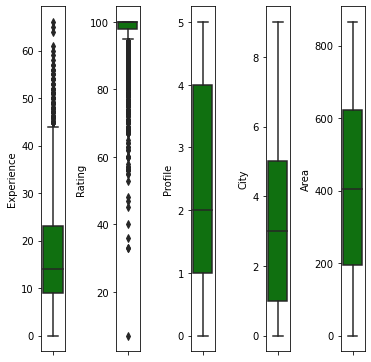

In [123]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_train[collist[i]],color='green',orient='v')
    plt.tight_layout()

As there are outliers present in this dataset, we can handle them by using z-score

# Handling outliers by using z-score method 

In [124]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_test))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([   2,   17,   65,   72,  104,  139,  168,  195,  214,  258,  264,
         362,  398,  412,  436,  449,  454,  564,  617,  622,  641,  652,
         671,  676,  772,  773,  964,  976,  992,  992,  996, 1001, 1061,
        1094, 1099, 1121, 1201, 1233, 1246, 1284, 1288, 1294, 1297, 1337,
        1394, 1405, 1425, 1451, 1501, 1530, 1566, 1640, 1657, 1724, 1776,
        1790, 1825, 1830, 1856, 1875, 1958], dtype=int64),
 array([2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
        2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))

In [125]:
#Removing outliers
df_newtest=df_test[(z<3).all(axis=1)]
df_newtest

,Qualification,Experience,Rating,Profile,City,Area
0,241,35,100,4,6,142
1,340,31,100,3,5,577
3,6,0,100,0,3,373
4,79,16,100,1,0,231
5,78,14,90,1,1,552
...,...,...,...,...,...,...
1982,17,10,100,0,0,58
1983,548,4,100,2,1,96
1984,474,9,100,4,1,423
1985,51,12,98,1,0,26


In [126]:
df_test.shape   #Original dataset dimensions

(1987, 6)

In [127]:
df_newtest.shape  #New dataset dimensions

(1927, 6)

60 rows of data had outliers and it has been removed by using z-score method

# Percentage loss of data after removal of outliers

In [128]:
percentage_loss=((60)/1987)*100   #60 = 1987-1927
print(percentage_loss)

3.019627579265224


Nearly 3% of data has been lost due to the removal of outliers

# Treating skewness

In [129]:
#We are treating skewness by using square root transform
for col in df_newtest.skew().index:
    if col in df_newtest.describe().columns:
        if df_newtest[col].skew()>0.55:
            df_newtest[col]=np.sqrt(df_newtest[col])
        if df_newtest[col].skew()<-0.55:
            df_newtest[col]=np.cbrt(df_newtest[col])

In [130]:
df_newtest.skew()   #Checking skewness after treating it

Qualification    0.318413
Experience      -0.003140
Rating          -2.540236
Profile          0.050704
City            -0.007042
Area             0.044755
dtype: float64

The skewness present in the data has been treated and now we can proceed further with the predictions of test data we have

# Loading the saved best model

In [131]:
fitted_model=pickle.load(open('DoctorFees_Project.pkl','rb'))

In [132]:
fitted_model   #Checking the model we have saved

RandomForestRegressor(criterion='mae', max_features='sqrt', n_estimators=500,
                      random_state=523)

We can see that RandomForestRegressor algorithm, which was finalized and saved after we found that it was the best model performing, is loaded and it is also showing the best parameters we obtained while doing Hyperparameter Tuning.

# Predictions over test data 

In [133]:
test_predictions=fitted_model.predict(df_newtest)   #Predicting the values

In [134]:
#Checking the predictions
test_predictions

array([396.01, 396.01, 348.99, ..., 391.81, 375.2 , 391.81])

We have predicted the values over the test data and now we will save the predicted values separately

# Saving the predicted values

In [135]:
test_results=pd.DataFrame(test_predictions)
test_results.to_csv('DoctorFees_Project_TestDataResults.csv')

# Conclusion

-> After getting an insight of this dataset, we were able to understand that doctor's fees are given on basis of different          features.

-> First we loaded the train dataset and did the EDA process and other pre-processing techniques like skewness check and            removal, handling the outliers present, filling the missing data, visualizing the distribution of data,etc.

-> Then we did the model training, building the model and finding out the best model on the basis of different metrices scores      we got like Mean Absolute Error, Mean squared Error, Root Mean Squared Error, etc.

-> We got LinearRegression and Ridge Regression Algorithm as the best algorithms among all as it gave more r2_score and            cross_val_score. Then for finding out the best parameter and improving the scores, we performed Hyperparameter Tuning.

-> As the scores were not increased, we also tried using Ensemble Techniques like RandomForestRegressor, AdaBoostRegressor and      GradientBoostingRegressor algorithms for boosting up our scores. Finally we concluded that RandomForestRegressor was the best    performing algorithm, although there were more errors in it and it had less RMSE compared to other algorithms. 

-> We saved the model in a pickle with a filename inorder to use wheneven we require.

-> We predicted the values obtained and saved it separately in a csv file.

-> Then we used the test dataset and performed all the pre-processing pipeline methods to it.

-> After handling outliers and treating skewness, we loaded the saved model that we obtained and did the predictions over the      test data and then saving the predictions separately in a csv file.

-> From this project, we learnt that how to handle train and test data separately and how to predict the values from them. This    will be useful while we are working in a real-time case study as we can get any new data from the client we work on and we      can proceed our analysis by loading the best model we obtained and start working on the analysis of the new data we have.

-> The final result will be the predictions we get from the new data and saving it separately.

-> Overall, we can say that this dataset is not upto the mark for predicting the doctor's consulting fees using regression          analysis and RandomForestRegressor is the best working algorithm model we obtained.

-> We can improve the data by adding more features that are positively correlated with the target variable, having less            outliers, normally distributed values, etc.